### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

Загрузим и посмотрим данные, приведем к нужному типу. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, timedelta

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')

In [4]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
visits.duplicated().sum()

0

In [7]:
# Изменим формат названия столбцов на принятый формат
visits = visits.rename(columns={'User Id':'user_id', 'Region':'region', 'Channel':'channel', \
                                'Device':'device', 'Session Start':'session_start', 'Session End':'session_end'})

In [8]:
#Приведем данные к формату дата
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [9]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [11]:
orders.duplicated().sum()

0

In [12]:
# Изменим формат названия столбцов на принятый формат
orders = orders.rename(columns={'User Id':'user_id', 'Event Dt':'event_dt', 'Revenue':'revenue'})

In [13]:
#Приведем данные к формату дата
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [14]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [16]:
costs.duplicated().sum()

0

In [17]:
# Изменим формат названия столбцов на принятый формат
costs = costs.rename(columns={'Channel':'channel'})

In [18]:
#Приведем данные к формату дата
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

С данными проблем не наюлюдается, дупликатов нет, названия столбцов поправили, даты привели к формату даты. Можно присткпать к работе с данными


# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [19]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [20]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [21]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Для получения профелей пользователей, воспользуемся функцией get_profiles

In [22]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
   # for event in event_names:
   #     if event in events['event_name'].unique():
   #         profiles[event] = profiles['user_id'].isin(
   #             events.query('event_name == @event')['user_id'].unique()
    #        )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


Исключим из данных Органических пользователей. Сделаем это, так как на их превлечение не тратятся рекламные средства , а целью работы ставится иследование эффективности рекламы.

In [23]:
visits = visits.query("channel != 'organic'")

In [24]:
#получим профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.08
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.09
2,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
3,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.21
4,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.01
...,...,...,...,...,...,...,...,...,...
95043,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.83
95044,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.11
95045,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.44
95046,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.60


In [25]:
#Определим минимальную дату привлечения пользователей.
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [26]:
#Определим максимальную дату привлечения пользователей.
profiles['first_ts'].max()

Timestamp('2019-10-31 18:42:12')

In [27]:
#Посмотрим из каких стран приходят посетители и какие страны дают больше всего платящих пользователей.
profiles.query('payer == True').groupby('region').agg({'user_id':'nunique'}) \
                               .sort_values(by='user_id',ascending=False) \
                                .rename(columns={'user_id':'count_id'}) \
                                .reset_index()

,region,count_id
0,United States,6367
1,UK,616
2,France,593
3,Germany,529


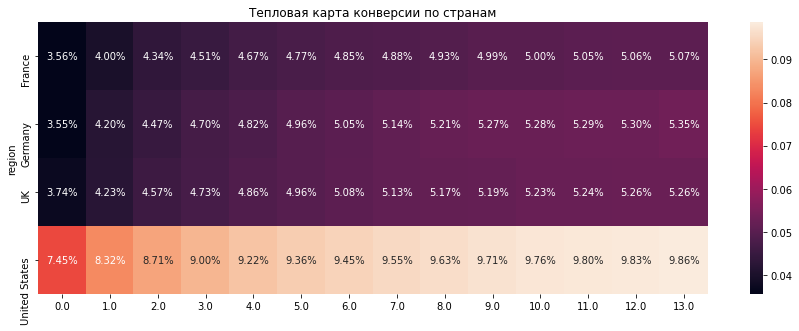

In [28]:
#Конверсия по странам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по странам')
plt.show()

Выше всего конверсия у посетителей из US: более 7% новых пользователей совершают покупки в день первого посещения, а к 14 дню «жизни» доля покупателей почти достигает 10%.

У остальных стран конверсия сопостовима 

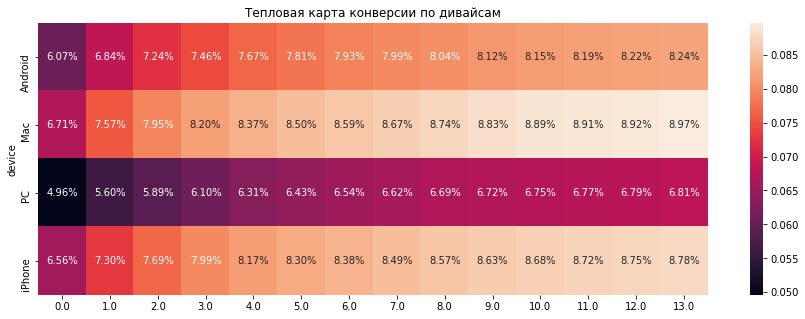

In [29]:
#Конверсия по дивайсам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по дивайсам')
plt.show()


Лучшую конвурсию показывают пользователи Мак и Айфон, более 6,5% процентов в первый день и к 14 дню конверсия сохраняется на уровне 9%

РС обладает наименьшим показателем конверсии на первый день ниже 5% и на последний день ниже 7%, а андройд показывает результаты сопостовимые с лидерами 

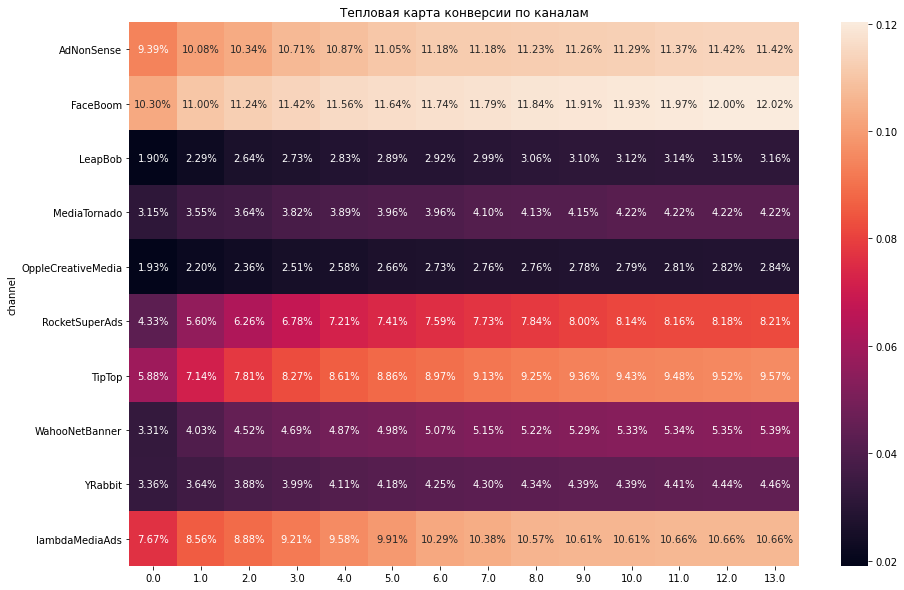

In [30]:
#Конверсия по каналам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plt.figure(figsize=(15, 10))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по каналам')
plt.show()

По конверсии мы можем видеть тройку лидеров FaceBoom, AdNonSense, LambdaMediaAd  и два канала явных оутсайдера LeapBob, OppleCreativeMedia

In [31]:
#Посмотрим какими устройствами они пользуются и с каких устройств чаще всего заходят платящие пользователи.
profiles.query('payer == True').groupby('device').agg({'user_id':'nunique'}) \
                               .sort_values(by='user_id',ascending=False) \
                                .rename(columns={'user_id':'count_id'}) \
                                .reset_index()

,device,count_id
0,iPhone,3118
1,Android,1865
2,Mac,1752
3,PC,1370


In [32]:
#посмотрим по каким рекламным каналам шло привлечение пользователей и какие каналы приносят больше всего платящих пользователей.
profiles.query('payer == True').groupby('channel').agg({'user_id':'nunique'}) \
                               .sort_values(by='user_id',ascending=False) \
                                .rename(columns={'user_id':'count_id'}) \
                                .reset_index()

,channel,count_id
0,FaceBoom,3611
1,TipTop,1940
2,AdNonSense,479
3,WahooNetBanner,475
4,RocketSuperAds,405
5,LeapBob,286
6,OppleCreativeMedia,257
7,lambdaMediaAds,241
8,YRabbit,208
9,MediaTornado,203


Из данного тследования мы увидили, что:

1. Пользователи приходят и четырех стран United States, UK, France, Germany

2. Потльзователи предпочитают: iPhone. Android,Mac, РС

3. Так же мы емеем 10 рекламных каналов для привлечения пользователей.

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [33]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


In [34]:
#Всего потратили
costs['costs'].sum()

105497.30000000002

In [35]:
#Всего на каждый источник
costs_by_source = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False).reset_index()
costs_by_source

,channel,costs
0,TipTop,"54,751.30"
1,FaceBoom,"32,445.60"
2,WahooNetBanner,"5,151.00"
3,AdNonSense,"3,911.25"
4,OppleCreativeMedia,"2,151.25"
5,RocketSuperAds,"1,833.00"
6,LeapBob,"1,797.60"
7,lambdaMediaAds,"1,557.60"
8,MediaTornado,954.48
9,YRabbit,944.22


In [36]:
#Всего на каждый источник по времени
costs.pivot_table(index='dt', columns='channel', values=['costs'], aggfunc='sum').head(10)

costs                                                   \
channel    AdNonSense FaceBoom LeapBob MediaTornado OppleCreativeMedia   
dt                                                                       
2019-05-01      40.95   113.30    2.52         6.24               4.25   
2019-05-02      34.65    78.10    2.94         5.04               4.25   
2019-05-03      47.25    85.80    2.73         6.96               5.75   
2019-05-04      51.45   136.40    3.99         9.36               4.25   
2019-05-05      36.75   122.10    4.62        11.04               5.50   
2019-05-06      43.05   118.80    4.62         9.60               5.00   
2019-05-07      30.45   101.20    4.20         8.88               5.75   
2019-05-08      37.80   100.10    3.99         6.72               4.25   
2019-05-09      37.80    93.50    3.78         6.72               4.25   
2019-05-10      46.20   104.50    3.36         8.64               5.75   

                                                                        
channel    RocketSuperAds TipTop WahooNetBanner YRabbit lambdaMediaAds  
dt                                                                      
2019-05-01          21.06  80.00          10.80    8.10          17.60  
2019-05-02          16.97  55.00           7.20    9.90          16.80  
2019-05-03          16.38  64.00           8.40    9.00          16.80  
2019-05-04          17.55  70.00          10.80   15.60          17.60  
2019-05-05          27.50  78.00          12.00    9.60          12.80  
2019-05-06          21.65  78.00          19.20   10.50          14.40  
2019-05-07          18.72  77.00           8.40    9.30          16.00  
2019-05-08          18.14  57.00           7.80   12.60          11.20  
2019-05-09          18.72  46.00          11.40   11.10          10.40  
2019-05-10          22.23  74.00          14.40   10.50          20.00

costs                                                   \
channel     AdNonSense FaceBoom LeapBob MediaTornado OppleCreativeMedia   
costs_month                                                               
2019-05-01    1,169.70 3,524.40  140.28       238.56             169.75   
2019-06-01      538.65 5,501.10  314.58       138.00             370.00   
2019-07-01      504.00 5,294.30  313.53       138.48             366.50   
2019-08-01      579.60 6,274.40  369.81       154.56             439.25   
2019-09-01      581.70 6,114.90  343.98       144.72             427.75   
2019-10-01      537.60 5,736.50  315.42       140.16             378.00   

                                                                            
channel     RocketSuperAds    TipTop WahooNetBanner YRabbit lambdaMediaAds  
costs_month                                                                 
2019-05-01          577.98  2,981.00         418.80  299.70         458.40  
2019-06-01          325.72  6,675.60         921.00  106.20         199.20  
2019-07-01          252.07  8,410.20         851.40   97.38         219.20  
2019-08-01          253.11 11,202.00       1,040.40  124.74         220.00  
2019-09-01          218.40 13,232.50         977.40  152.79         247.20  
2019-10-01          205.73 12,250.00         942.00  163.41         213.60

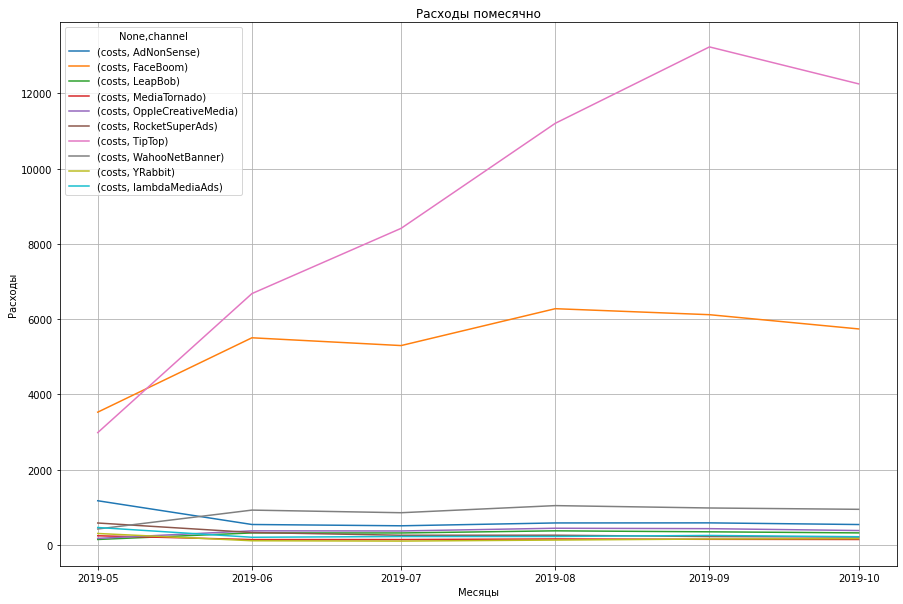

In [37]:
#Затраты всего по времени
costs['costs_month'] = costs['dt'].astype('datetime64[M]').dt.date
#costs_by_month = costs.groupby('costs_month').agg({'costs':'sum'}) \
#                            .sort_values(by='costs', ascending=False) \
#                            .reset_index()

costs_by_month = costs.pivot_table(index='costs_month', columns='channel', values=['costs'], aggfunc='sum') \
.reset_index().sort_values(by='costs_month').set_index('costs_month')

costs_by_month.plot(figsize=(15, 10), grid=True) \
.set(xlabel='Месяцы', ylabel='Расходы', title='Расходы помесячно')

costs_by_month

In [38]:
#Оценим, сколько в среднем стоило привлечение одного покупателя из каждого источника. Посчитаем САС
#Данные возьмем из результата работы функции get_profiles, в столбце acquisition_cost находится 
#стоимость привлечения каждого посетителя
profiles[['user_id', 'acquisition_cost']].head(10)

,user_id,acquisition_cost
0,599326,1.08
1,4919697,1.09
2,22593348,0.99
3,31989216,0.21
4,46006712,1.01
5,58263264,1.12
6,59835779,0.25
7,69985732,0.25
8,93828625,0.20
9,112595447,3.00


In [39]:
#средний САС 
profiles['acquisition_cost'].mean()

1.1099370844205034

In [40]:
profiles.groupby('channel', as_index=False).agg({'acquisition_cost':'mean'}) \
                                            .sort_values(by='acquisition_cost', ascending=False)

,channel,acquisition_cost
6,TipTop,2.77
1,FaceBoom,1.10
0,AdNonSense,0.98
9,lambdaMediaAds,0.70
7,WahooNetBanner,0.60
5,RocketSuperAds,0.40
4,OppleCreativeMedia,0.25
3,MediaTornado,0.21
8,YRabbit,0.21
2,LeapBob,0.21


In [41]:
profiles.groupby('user_id').agg({'acquisition_cost':'mean'}) \
                                            .sort_values(by='acquisition_cost', ascending=False) \
                                            .reset_index().head()

,user_id,acquisition_cost
0,64281471331,3.66
1,542302008760,3.66
2,386545579316,3.66
3,750409625804,3.66
4,659405331303,3.66


In [42]:
#Оценим затраты по типу устройств
profiles.groupby(['device']).agg({'acquisition_cost':'sum'}).sort_values(by='acquisition_cost', ascending=False).reset_index()

,device,acquisition_cost
0,iPhone,"43,688.18"
1,Mac,"24,076.78"
2,Android,"22,457.04"
3,PC,"15,275.29"


In [43]:
#Посмотрим какими устройствами чаще пользуются клиенты
profiles.groupby(['device']).agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False) \
                            .rename(columns={'user_id':'count_user_id'}) \
                            .reset_index()

,device,count_user_id
0,iPhone,34433
1,Android,22163
2,PC,19463
3,Mac,18989


В данном разделе, мы можем увидеть, что реклама, судя по затратам сфокусированна на пользователей iPhone, среди остальных платформа разница в затратах ниже.

Так же мы можем оценить распределение затрат по каналам рекламы и по времени. у нас есть явный лидер TipTop, так же мы видим, что затраты в рассматриваемый период растут и к 6 месяцу они врзрастают в двое.

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [44]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

### Проанализируем общую окупаемость рекламы

In [45]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

In [46]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [47]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

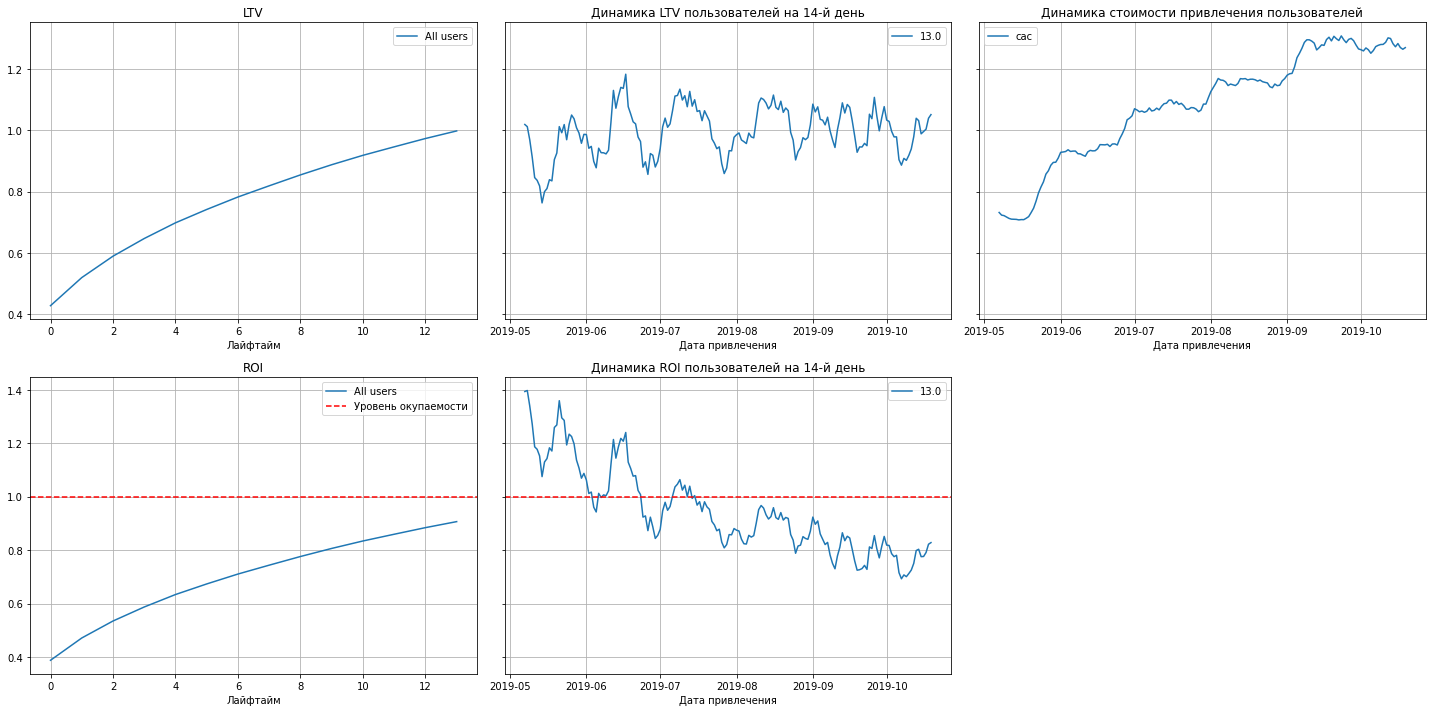

In [48]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:

1. Реклама не окупилась. ROI смог достичь только 90%.

2. CAC не стабилен. Мы видим увеличение рекламного бюджета.

3. С увеличением рекламного бюджета диапазон колебания LTV сжисается 

4. Интересным моментом является снижение динамики ROI на фоне увеличения рекламных расходов на привлечение пользователй

### Проанализируем окупаемость рекламы с разбивкой по устройствам

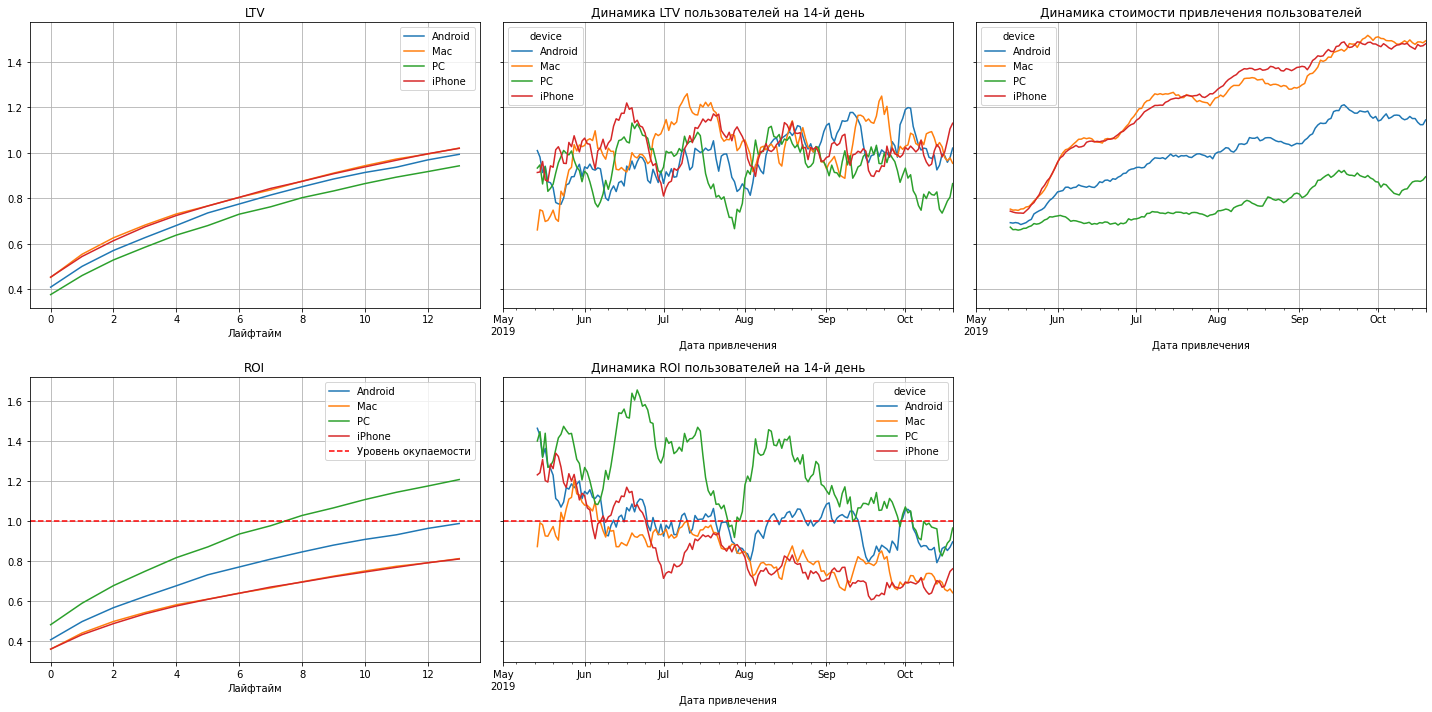

In [49]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Из графиков мы видим:

1. Пользователи PC окупаются, пользователи Android смогли выйти на точку окупаемости, а вот с пользователяит Iphone и Mac явные проблемы, несмотря на то, что на эту группу приходится максимальное увеличение рекламных затрат 

### Проанализируйте окупаемость рекламы с разбивкой по странам

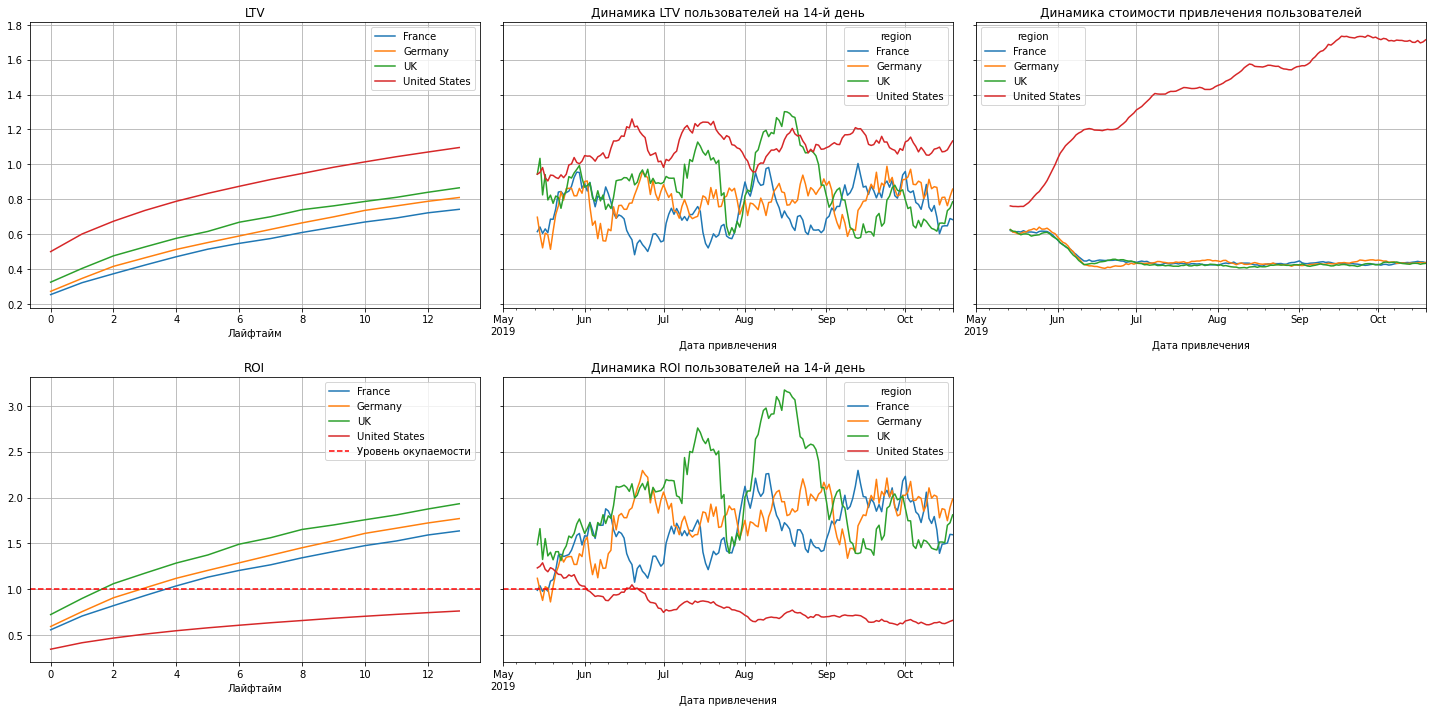

In [50]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Посмотрим на результат графиков:

1. Реклама окупается не везде. US явно отстают, несмотря на увеличения рекламного бюджета в этой стране.

2. Стоимость привлечения относительна стабильна за исключение US, там она бурно растет

3. LTV в целом стабилен стабилен.

4. Лучше всего окупается UK, а вот US явно отстает.

Мы можем заметить, что проблаема связаня со страной, несмотря на увеличение стоимости привлечения клиентов, в US они никак не дотягивают до окупаемости

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

In [51]:
profiles_us = profiles.query("region == 'United States'")

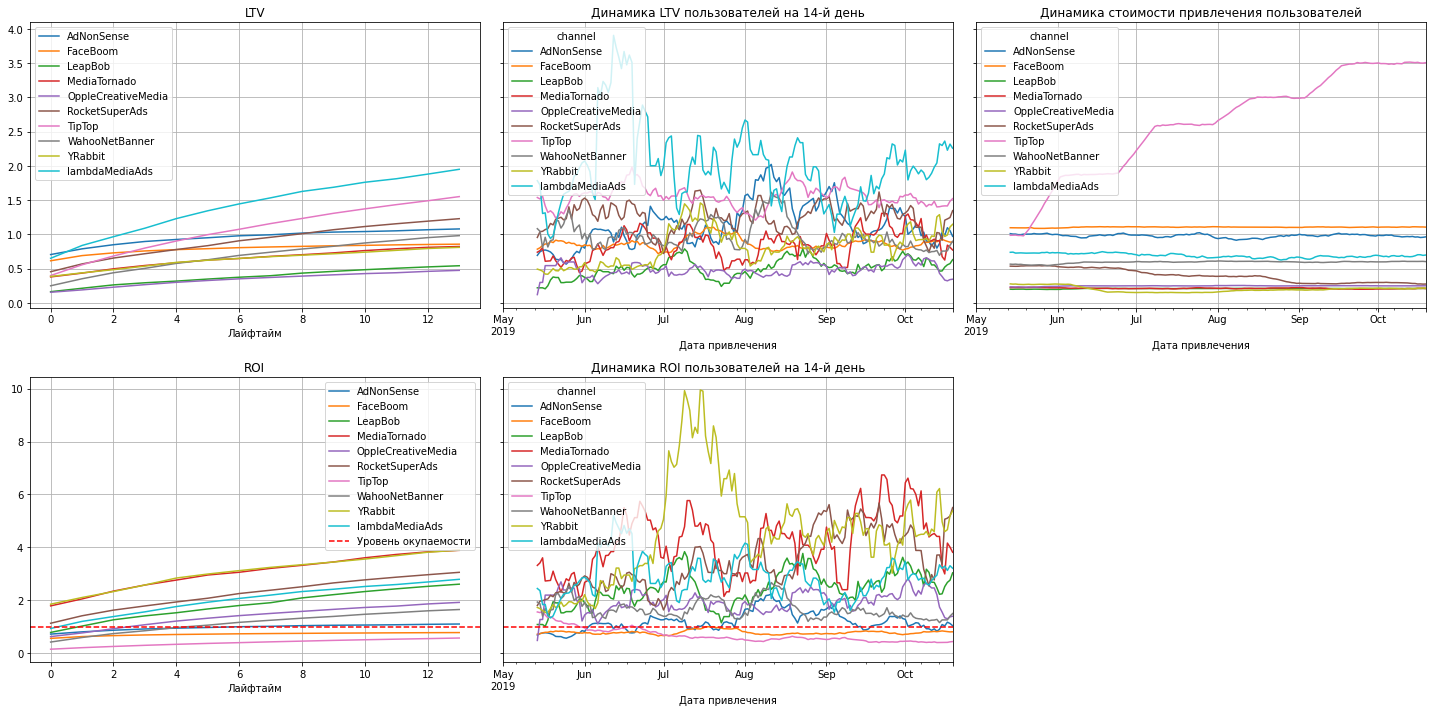

In [52]:
# смотрим окупаемость с разбивкой по источникам привлечения для всех регионов

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Мы видим, что приоритетным каналом является TipTop, возможно это связано с тем, что он лучше работает в US так как именно там сосредоточено большенство полтзователей, но при этом у этого канала самый низкий ROI

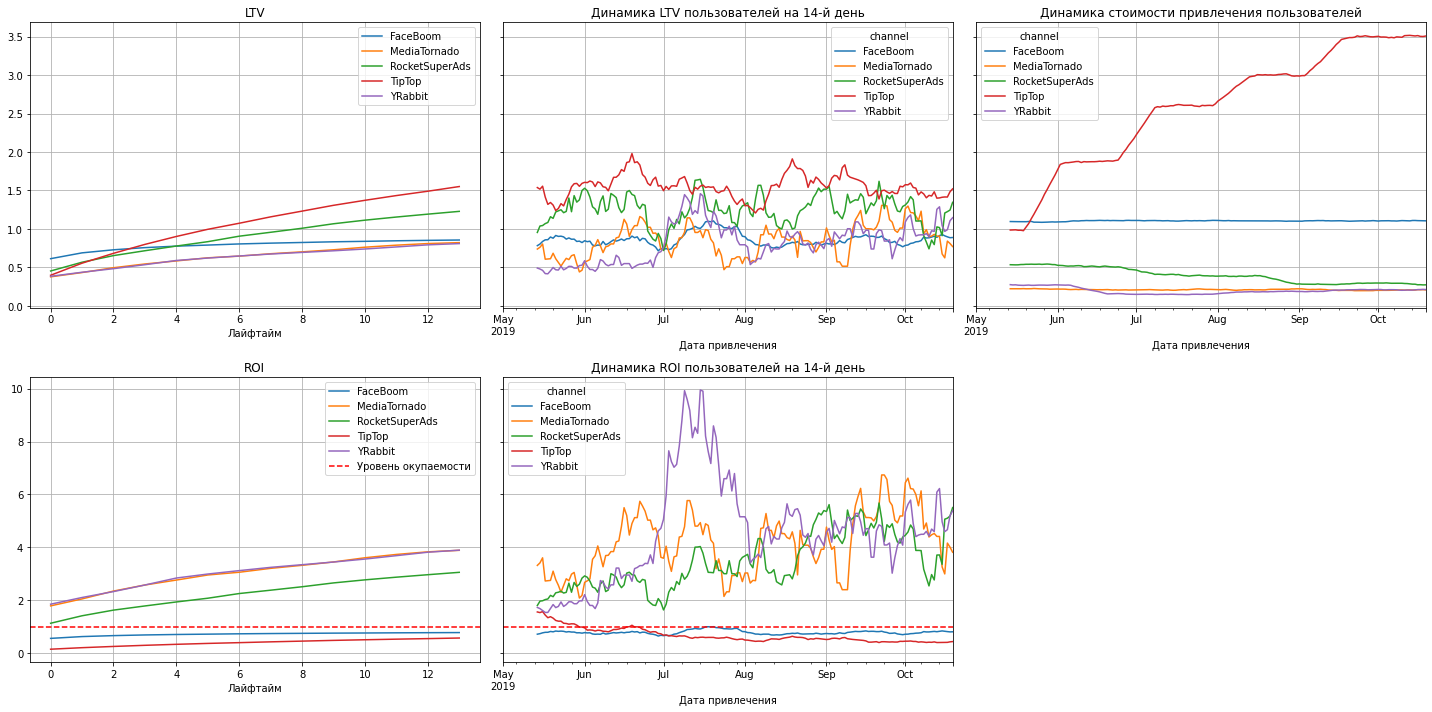

In [53]:
# смотрим окупаемость с разбивкой по источникам привлечения US

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_us, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

А если посмотреть только по америки картина по каналам меняется и ROI у TipTop не доходит до 1. Для америки лидер по ROI изменились на Yrabbit и RocketSuperAds

### Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Посчитаем и визуализируем конверсию, вызвав функции get_conversion()

In [54]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

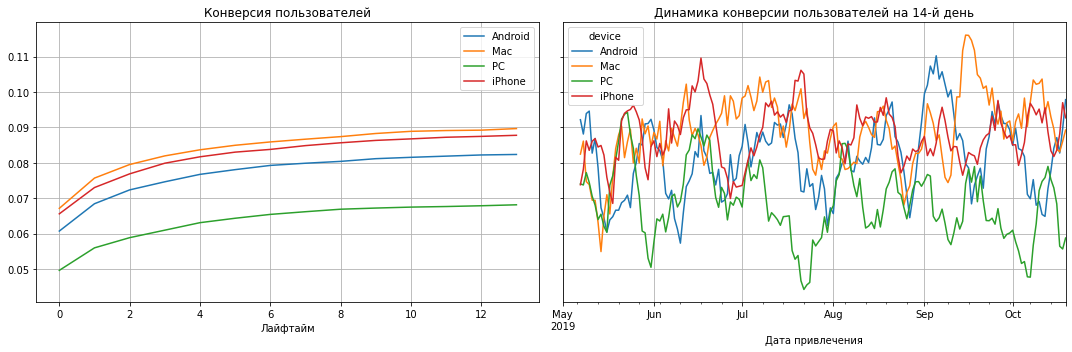

In [55]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Можно сказать что пользователи Мак и Айфон конвертируются стабильно хорошо, видимо дело в удержании

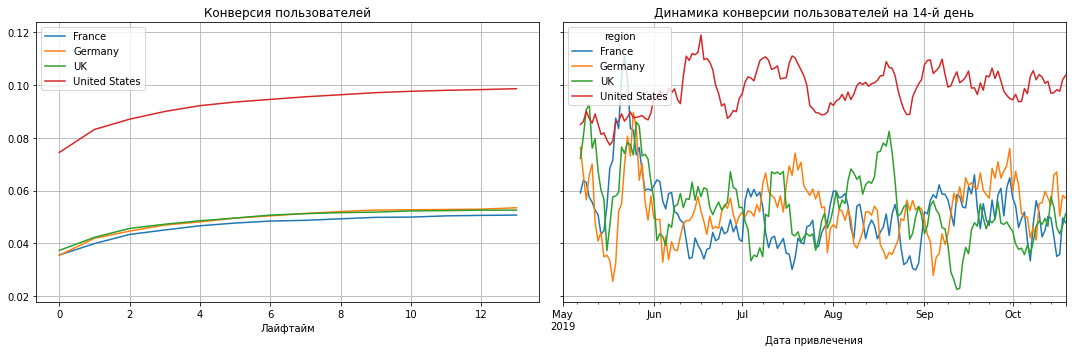

In [56]:
# смотрим конверсию с разбивкой по регионам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

С конверсией по регионам тоже все выглидит стабильно

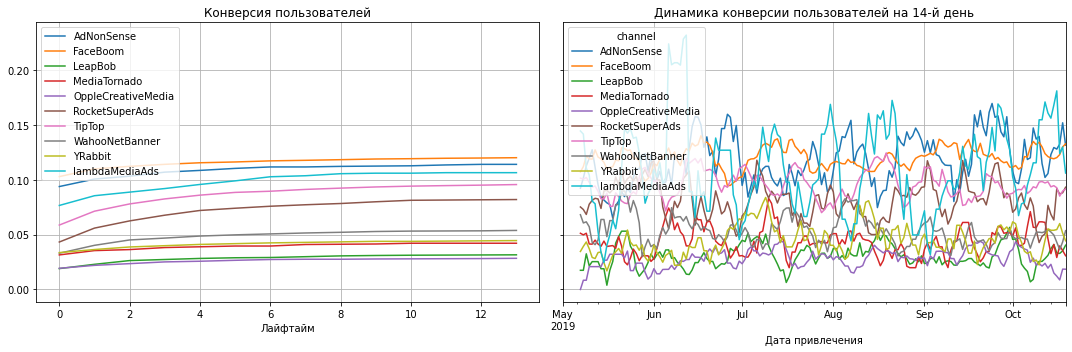

In [57]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия по **каналам** выглядит стабильно на всем временном интервале

In [58]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

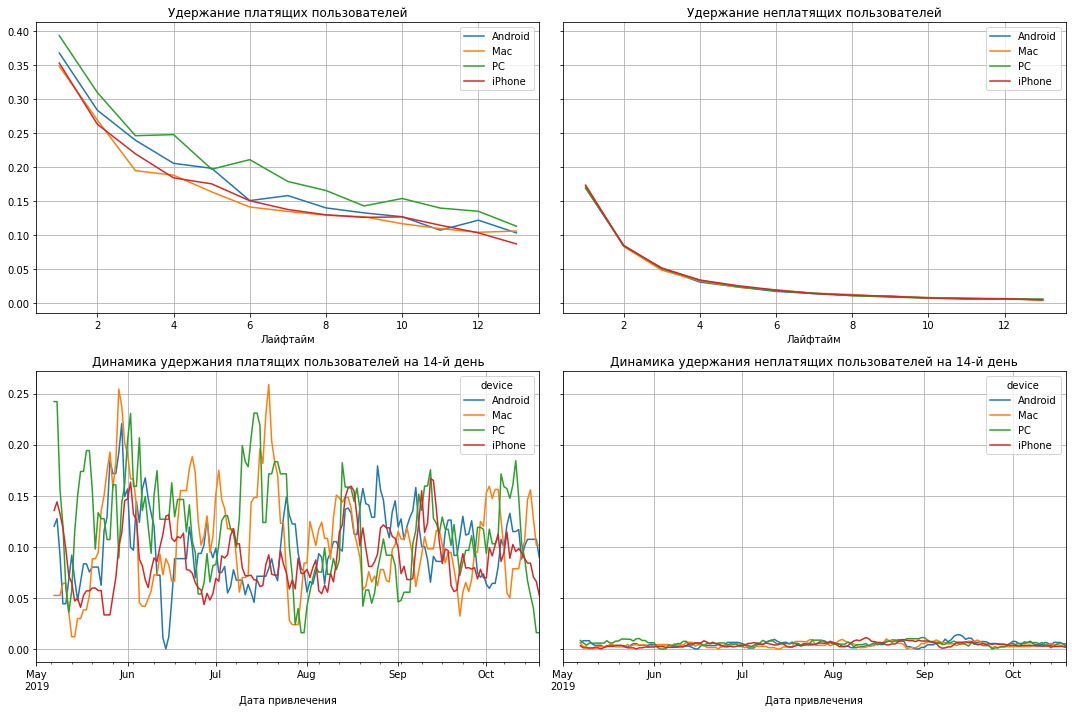

In [59]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

А ваот с удержанием пользователей  не все так одназначно, пользователи на Мак и Айфон удерживаются хуже, а при этом таких пользователей больше чем с остальных устройств

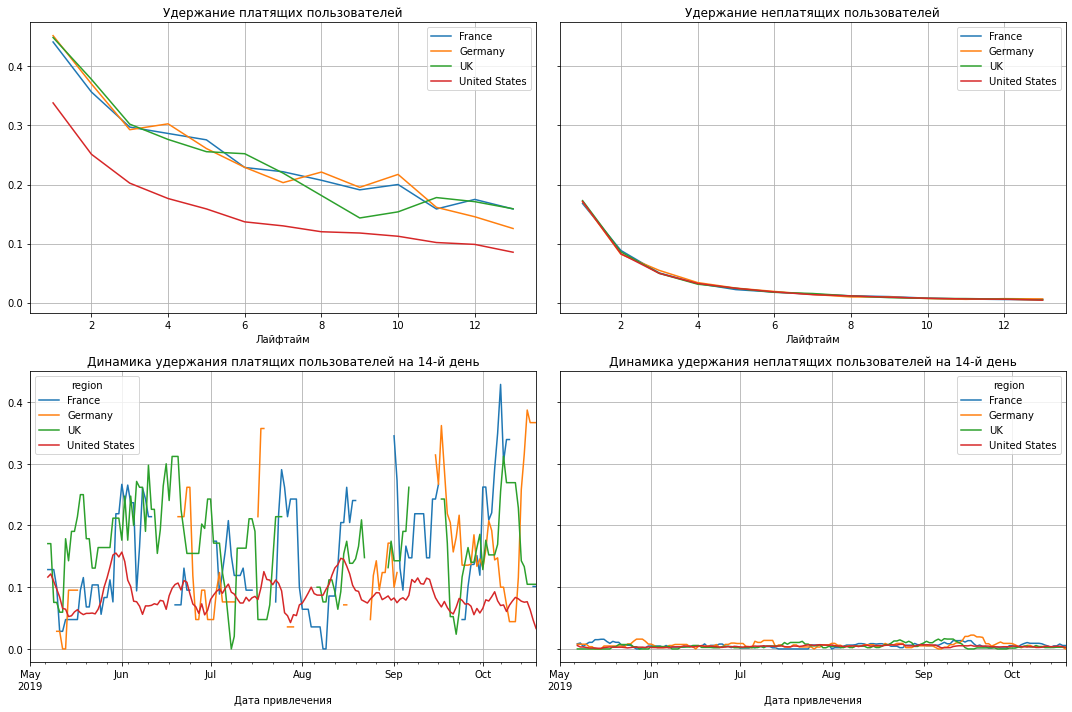

In [60]:
# смотрим удержание с разбивкой по регионам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

In [61]:
profiles.query("region == 'United States'").groupby('device').agg({'user_id':'nunique'}) \
                                            .sort_values(by='user_id', ascending=False) \
                                            .rename(columns={'user_id':'count_user_id'}) \
                                            .reset_index()

,device,count_user_id
0,iPhone,27996
1,Mac,15665
2,Android,12630
3,PC,6531


В US где больше всего сосредаточено пользователей удержание самое плохое. В US предпочитают пользоваться Мак и Айфон а с пользованием  приложения с этих устройств какие-то проблемы

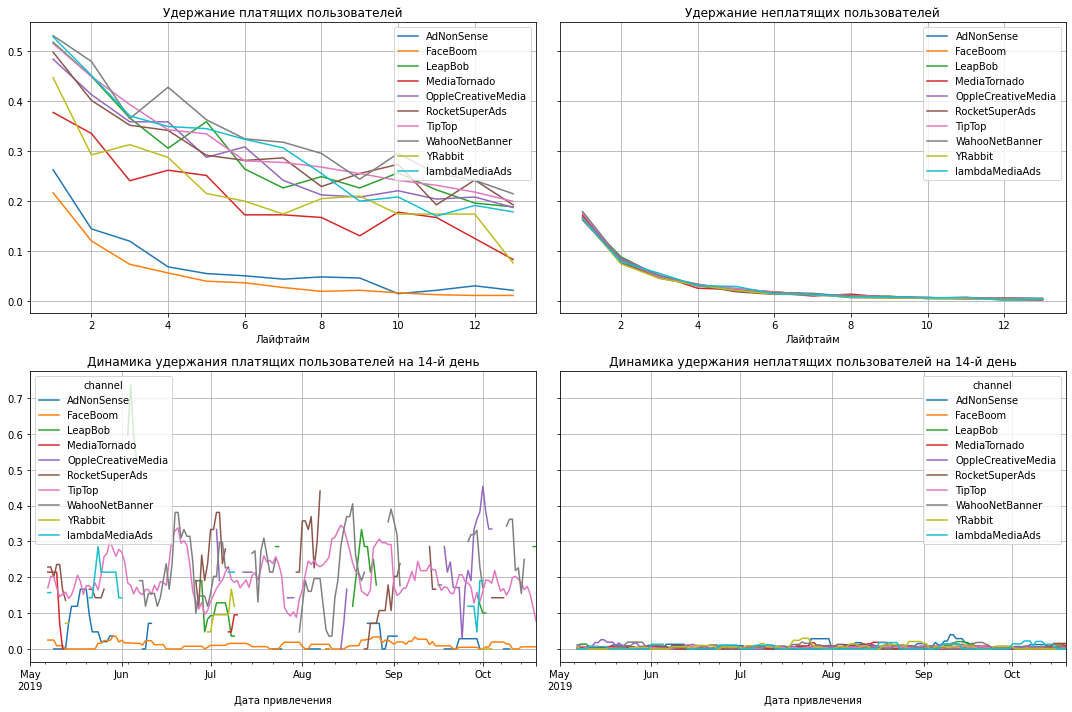

In [62]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По каналам, мы можем видеть два аутсайдера  AdNonSense и FaceBoom

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Подытожим промежуточные выводы:

Пользователи приходят и четырех стран United States, UK, France, Germany с разных устройств: iPhone. Android,Mac, РС

Так же мы емеем 10 рекламных каналов для привлечения пользователей.

Так же млжно сказать, что реклама, судя по затратам сфокусированна на пользователей iPhone, среди остальных платформ разница в затратах ниже.

Так же мы можем оценить распределение затрат по каналам рекламы и по времени. у нас есть явный лидер TipTop, так же можно отметить, что затраты в рассматриваемый период растут и к 6 месяца они врзрастают в двое.

**общая окупаемость рекламы **
 
1. Реклама не окупилась. ROI смог достичь только 90%.

2. CAC не стабилен. Мы видим увеличение рекламного бюджета.

3. С увеличением рекламного бюджета диапазон колебания LTV сжисается 

4. Интересным моментом является снижение динамики ROI на фоне увеличения рекламных расходов на привлечение пользователй


**Окупаемость рекламы с разбивкой по устройствам**

Пользователи PC окупаются, пользователи Android смогли выйти на точку окупаемости, а вот с пользователяит Iphone и Mac явные проблемы, несмотря на то, что на эту группу приходится максимальное увеличение рекламных затрат

**Окупаемость рекламы с разбивкой по странам**

1. Реклама окупается не везде. US явно отстают, несмотря на увеличения рекламного бюджета в этой стране.

2. Стоимость привлечения относительна стабильна за исключение US, там она бурно растет

3. LTV в целом стабилен.

4. Лучше всего окупается UK, а вот US явно отстает.

Мы можем заметить, что проблаема связана со страной, несмотря на увеличение стоимости привлечения клиентов, в US они никак не дотягивают до окупаемости

**Окупаемость рекламы с разбивкой по рекламным каналам**

Ситуация следующая, приоритетным каналом является TipTop, возможно это связано с тем, что он лучше работает в US так как именно там сосредоточено большенство полтзователей, но при этом у этого канала самый низкий ROI

**Конверсию с разбивкой по устройствам**

Можно сказать что пользователи Мак и Айфон конвертируются стабильно хорошо, видимо дело в удержании

**Конверсию с разбивкой по регионам**

С конверсией по регионам тоже все выглидит стабильно

**Конверсию с разбивкой по каналам**

Конверсия по регионам выглядит стабильно на всем временном интервале

**Удержание с разбивкой по устройствам**

А ваот с удержанием пользователей не все так одназначно, пользователи на Мак и Айфон удерживаются хуже, а при этом таких пользователей больше чем пользователей с остальных устройств

**Удержание с разбивкой по регионам**

В US где больше всего сосредаточено пользователей удержание самое плохое. В US предпочитают пользоваться Мак и Айфон а с пользованием приложения с этих устройств какие-то проблемы

**Удержание с разбивкой по каналам**

По каналам, мы можем видеть два аутсайдера AdNonSense и FaceBoom

**Рекомендации для отдела маркетинга для повышения эффективности**

Стоит  обратить внимание на владельцев Iphone и Mac, и детельней разобраться с чем связано низкое удержание клиентов с этими устройствами на рынке US.  Данный сигмент рынка является самы большим, и устранение проблем приведет к росту доходности.

Так же можно отказаться от рекламных каналов дающих самое слабое удержание платящих клиентов , это AdNonSense и FaceBoom. В свою очередь это позволит более эффективно перераспределить рекламный бюджет и максимально использовать более эффективные каналы.